# Accuracy (Přesnost klasifikace)

In [1]:
from sklearn.metrics import accuracy_score

y_true = [1,1,1,1,0,0,0,0]    # Skutečné třídy: 1=pozitivní, 0=negativní (např. 1 = "kašel")
y_pred = [1,0,0,1,0,1,0,0]    # Predikce modelu pro tytéž případy

acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.625


# Precision (Pozitivní predikce)

In [2]:
from sklearn.metrics import precision_score

# Pokračujeme s y_true a y_pred z předchozího příkladu
prec = precision_score(y_true, y_pred)
print(f"Precision: {prec:.3f}")

Precision: 0.667


# Recall (Citlivost, záchyt)

In [3]:
from sklearn.metrics import recall_score

rec = recall_score(y_true, y_pred)
print(f"Recall: {rec:.3f}")

Recall: 0.500


# F1 Score (Harmonické průměr precision a recall)

In [4]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print(f"F1 score: {f1:.3f}")

F1 score: 0.571


# Confusion Matrix (Matice záměn)

In [5]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[3 1]
 [2 2]]


£ ROC AUC (Receiver Operating Characteristic – plocha pod křivkou)

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve

# Příklad skóre (predikční pravděpodobnosti pozitivní třídy pro každý vzorek):
y_scores = [0.9, 0.4, 0.2, 0.8, 0.1, 0.7, 0.3, 0.05]  # stejně dlouhý jako y_true
auc = roc_auc_score(y_true, y_scores)
fpr, tpr, thresh = roc_curve(y_true, y_scores)

print(f"ROC AUC: {auc:.3f}")

ROC AUC: 0.812


# Precision-Recall křivka

In [7]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
ap = average_precision_score(y_true, y_scores)
print(f"Average Precision (AP): {ap:.3f}")

Average Precision (AP): 0.854


Zde je názornější a plně funkční příklad v Pythonu, který:

1. Vytvoří syntetická data pro binární klasifikaci.
2. Spočítá precision-recall křivku.
3. Vykreslí křivku v grafu pomocí matplotlib.
4. Vypíše Average Precision (AP) skóre.

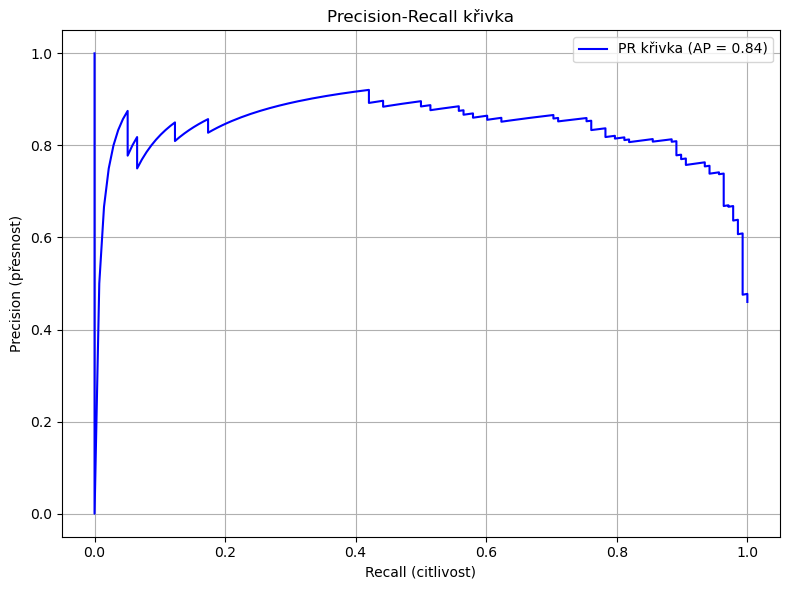

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1️⃣ Generování dat
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_informative=2, n_redundant=10, random_state=42)

# 2️⃣ Rozdělení na trénovací a testovací data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Trénink jednoduchého modelu
model = LogisticRegression()
model.fit(X_train, y_train)

# 4️⃣ Předpověď pravděpodobností pro třídu 1
y_scores = model.predict_proba(X_test)[:, 1]

# 5️⃣ Výpočet Precision-Recall křivky
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

# 6️⃣ Vizualizace
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label=f'PR křivka (AP = {ap:.2f})', color='blue')
plt.xlabel('Recall (citlivost)')
plt.ylabel('Precision (přesnost)')
plt.title('Precision-Recall křivka')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Log Loss (Logaritmická ztráta)

In [12]:
from sklearn.metrics import log_loss

# Příklad pravděpodobnostních predikcí pro dvě třídy (na každém řádku: [P(třída0), P(třída1)]):
y_true = [0, 1, 1, 0]
y_pred_proba = [[0.9, 0.1],
                [0.4, 0.6],
                [0.2, 0.8],
                [0.7, 0.3]]  # každý vnořený list je predikce pro vzorek

ll = log_loss(y_true, y_pred_proba)
print(f"Log loss: {ll:.3f}")

Log loss: 0.299


# Všechny základní metirky dohromady

Trénování jednoduchého klasifikátoru, s vypočítem různých metrik

Accuracy: 0.89
Precision: 0.81
Recall: 0.72
F1 Score: 0.76


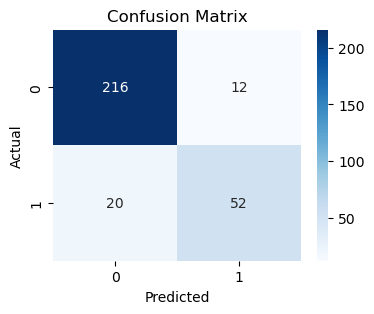

In [26]:
# 1. Nastavení
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# 2. Generování dat a štrénováníkolení
# Vytvoří dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=2,
    n_redundant=2,
    n_classes=2,
    weights=[0.8, 0.2],  # 80% of one class, 20% of the other (imbalanced)
    random_state=42
)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Trénink jednoduchého LR modelu
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# 3. Výpočet metrik
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

# 4. Matice zmatení
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

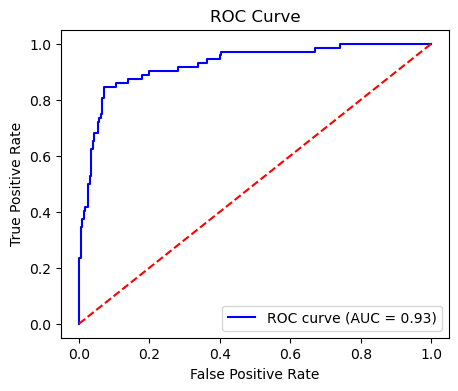

In [15]:
# 5. Křivka ROC a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()